In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
cols= """
Destination Port, 
Flow Duration, 
Total Fwd Packets, 
Total Backward Packets, 
Total Length of Fwd Packets, 
Total Length of Bwd Packets, 
Fwd Packet Length Max, 
Fwd Packet Length Min, 
Fwd Packet Length Mean, 
Fwd Packet Length Std, 
Bwd Packet Length Max, 
Bwd Packet Length Min, 
Bwd Packet Length Mean, 
Bwd Packet Length Std, 
Flow Bytes/s, 
Flow Packets/s, 
Flow IAT Mean, 
Flow IAT Std, 
Flow IAT Max, 
Flow IAT Min, 
Fwd IAT Total, 
Fwd IAT Mean, 
Fwd IAT Std, 
Fwd IAT Max, 
Fwd IAT Min, 
Bwd IAT Total, 
Bwd IAT Mean, 
Bwd IAT Std, 
Bwd IAT Max, 
Bwd IAT Min, 
Fwd PSH Flags, 
Bwd PSH Flags, 
Fwd URG Flags, 
Bwd URG Flags,
Fwd Header Length, 
Bwd Header Length, 
Fwd Packets/s, 
Bwd Packets/s, 
Min Packet Length, 
Max Packet Length, 
Packet Length Mean, 
Packet Length Std, 
Packet Length Variance, 
FIN Flag Count, 
SYN Flag Count, 
RST Flag Count, 
PSH Flag Count, 
ACK Flag Count, 
URG Flag Count, 
CWE Flag Count, 
ECE Flag Count, 
Down/Up Ratio, 
Average Packet Size, 
Avg Fwd Segment Size, 
Avg Bwd Segment Size, 
Fwd Header Length.1, 
Fwd Avg Bytes/Bulk, 
Fwd Avg Packets/Bulk, 
Fwd Avg Bulk Rate, 
Bwd Avg Bytes/Bulk, 
Bwd Avg Packets/Bulk, 
Bwd Avg Bulk Rate, 
Subflow Fwd Packets, 
Subflow Fwd Bytes, 
Subflow Bwd Packets, 
Subflow Bwd Bytes, 
Init_Win_bytes_forward, 
Init_Win_bytes_backward, 
act_data_pkt_fwd, 
min_seg_size_forward, 
Active Mean, 
Active Std, 
Active Max, 
Active Min, 
Idle Mean, 
Idle Std, 
Idle Max, 
Idle Min, Label"""



columns=[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())

#columns.append('Label')
#print(columns)
print(len(columns))

79


In [3]:
#columns = list(pd.read_csv(path))
#print(columns)

In [4]:
path = "Friday-WorkingHours-Afternoon-DDos.csv"
df = pd.read_csv(path)

df1=pd.read_csv("iscx/Friday-WorkingHours-Afternoon-DDos.csv")

df2=pd.read_csv("iscx/Friday-WorkingHours-Afternoon-PortScan.csv")
df3=pd.read_csv("iscx/Friday-WorkingHours-Morning.csv")
df4=pd.read_csv("iscx/Monday-WorkingHours.csv")
df5=pd.read_csv("iscx/Thursday-WorkingHours-Afternoon-Infilteration.csv")
df6=pd.read_csv("iscx/Thursday-WorkingHours-Morning-WebAttacks.csv")
df7=pd.read_csv("iscx/Tuesday-WorkingHours.csv")
df8=pd.read_csv("iscx/Wednesday-workingHours.csv")

#Adding Attack Type column
#df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]])

df.head()

C:\Users\Mohab\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Mohab\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [5]:
df=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8])

In [6]:
df[' Label'].value_counts()

BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name:  Label, dtype: int64

In [7]:
df.dtypes

 Destination Port                int64
 Flow Duration                   int64
 Total Fwd Packets               int64
 Total Backward Packets          int64
Total Length of Fwd Packets      int64
                                ...   
Idle Mean                      float64
 Idle Std                      float64
 Idle Max                        int64
 Idle Min                        int64
 Label                          object
Length: 79, dtype: object

In [8]:
df.isnull().sum()

 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
 Label                         0
Length: 79, dtype: int64

In [9]:
#cleaning null values in features
df[df.isnull().any(axis=1)]

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
6796,36812,0,2,0,0,0,0,0,0.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
14739,53581,0,1,1,0,0,0,0,0.0,0.0,...,44,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
15047,80,0,2,0,0,0,0,0,0.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
209728,18467,0,2,0,0,0,0,0,0.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
12824,13370,0,2,0,0,0,0,0,0.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602009,50834,0,1,1,0,0,0,0,0.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
629492,45113,0,1,1,0,0,0,0,0.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
653553,48698,0,2,0,0,0,0,0,0.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
671012,22567,0,2,0,0,0,0,0,0.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [10]:
#Label encoding starts here
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
encoder = LabelEncoder()
onehot = OneHotEncoder()

In [11]:
#finding categorical (dtype: object) features
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,Flow Bytes/s,Flow Packets/s,Label
0,4000000,666666.6667,BENIGN
1,110091.7431,18348.62385,BENIGN
2,230769.2308,38461.53846,BENIGN
3,352941.1765,58823.52941,BENIGN
4,4000000,666666.6667,BENIGN


In [12]:
#df.apply(LabelEncoder().fit_transform)

In [13]:

for column in df.columns:
    print(column)

 Destination Port
 Flow Duration
 Total Fwd Packets
 Total Backward Packets
Total Length of Fwd Packets
 Total Length of Bwd Packets
 Fwd Packet Length Max
 Fwd Packet Length Min
 Fwd Packet Length Mean
 Fwd Packet Length Std
Bwd Packet Length Max
 Bwd Packet Length Min
 Bwd Packet Length Mean
 Bwd Packet Length Std
Flow Bytes/s
 Flow Packets/s
 Flow IAT Mean
 Flow IAT Std
 Flow IAT Max
 Flow IAT Min
Fwd IAT Total
 Fwd IAT Mean
 Fwd IAT Std
 Fwd IAT Max
 Fwd IAT Min
Bwd IAT Total
 Bwd IAT Mean
 Bwd IAT Std
 Bwd IAT Max
 Bwd IAT Min
Fwd PSH Flags
 Bwd PSH Flags
 Fwd URG Flags
 Bwd URG Flags
 Fwd Header Length
 Bwd Header Length
Fwd Packets/s
 Bwd Packets/s
 Min Packet Length
 Max Packet Length
 Packet Length Mean
 Packet Length Std
 Packet Length Variance
FIN Flag Count
 SYN Flag Count
 RST Flag Count
 PSH Flag Count
 ACK Flag Count
 URG Flag Count
 CWE Flag Count
 ECE Flag Count
 Down/Up Ratio
 Average Packet Size
 Avg Fwd Segment Size
 Avg Bwd Segment Size
 Fwd Header Length.1
Fwd Avg

In [14]:
#Finding categorical features
num_cols = df._get_numeric_data().columns

cate_cols = list(set(df.columns)-set(num_cols))

cate_cols

[' Label', ' Flow Packets/s', 'Flow Bytes/s']

In [15]:
df.drop(' Flow Packets/s',axis = 1,inplace= True)

In [16]:
df.drop('Flow Bytes/s',axis = 1,inplace= True)

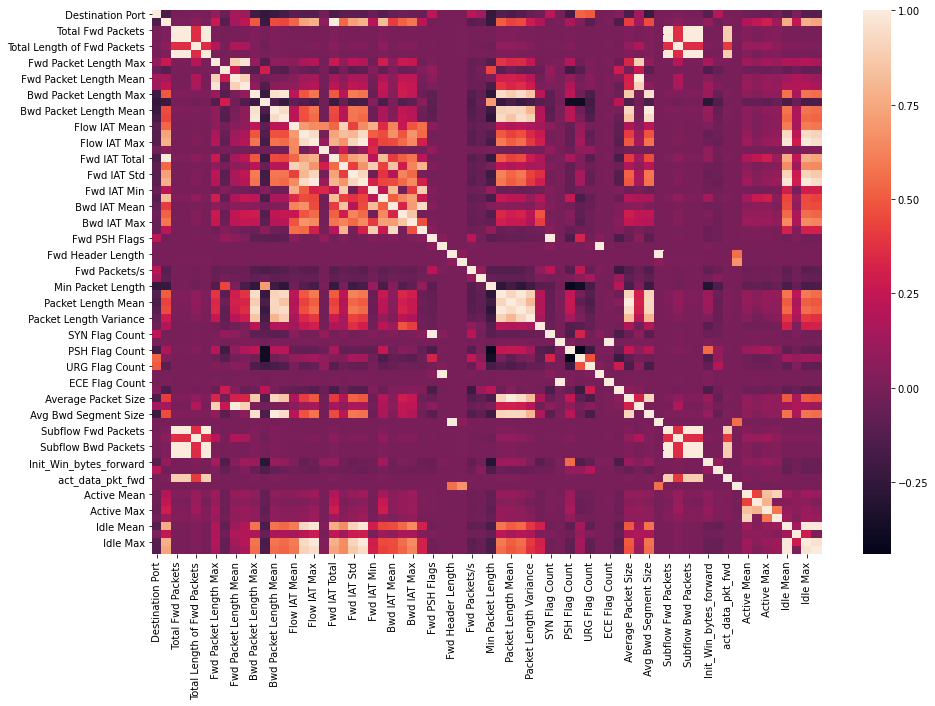

In [17]:
df = df.dropna('columns')# drop columns with NaN

df = df[[col for col in df if df[col].nunique() > 1]]# keep columns where there are more than 1 unique values

corr = df.corr()

plt.figure(figsize=(15,10))

sns.heatmap(corr)
#sns.set(font_scale=1.6)


plt.show()

In [18]:
df_std = df.std()
df_std = df_std.sort_values(ascending = True)
df_std

 Fwd URG Flags     1.054826e-02
 CWE Flag Count    1.054826e-02
 RST Flag Count    1.556536e-02
 ECE Flag Count    1.559935e-02
FIN Flag Count     1.847378e-01
                       ...     
 Flow IAT Max      2.445954e+07
 Fwd IAT Max       2.452916e+07
Bwd IAT Total      2.873661e+07
Fwd IAT Total      3.357581e+07
 Flow Duration     3.365374e+07
Length: 68, dtype: float64

In [19]:
df.shape

(2830743, 69)

In [20]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [21]:
#df = df.drop(['target',], axis=1)
print(df.shape)

# Target variable and train set
Y = df[[' Label']]
X = df.drop([' Label',], axis=1)

sc = MinMaxScaler()
X = sc.fit_transform(X)

# Split test and train data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)


(2830743, 69)
(1896597, 68) (934146, 68)
(1896597, 1) (934146, 1)


In [20]:
#Decision Tree 
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [21]:
start_time = time.time()
DT.fit(X_train, Y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

Training time:  33.18317365646362


In [22]:
start_time = time.time()
Y_test_pred_DT = DT.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

Testing time:  0.2852611541748047


In [23]:
print("Train score is:", DT.score(X_train, Y_train))
print("Test score is:",DT.score(X_test,Y_test))
print(sklearn.metrics.classification_report(Y_test, Y_test_pred_DT))

Train score is: 0.9602688394002521
Test score is: 0.9600308731183348


C:\Users\Mohab\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                            precision    recall  f1-score   support

                    BENIGN       0.96      1.00      0.98    749637
                       Bot       0.00      0.00      0.00       658
                      DDoS       1.00      0.99      0.99     42188
             DoS GoldenEye       0.95      0.66      0.78      3399
                  DoS Hulk       0.98      0.67      0.80     76550
          DoS Slowhttptest       0.00      0.00      0.00      1793
             DoS slowloris       0.00      0.00      0.00      1927
               FTP-Patator       0.84      0.99      0.91      2649
                Heartbleed       0.67      1.00      0.80         2
              Infiltration       0.00      0.00      0.00         8
                  PortScan       0.97      0.99      0.98     52644
               SSH-Patator       0.00      0.00      0.00      1957
  Web Attack � Brute Force       0.00      0.00      0.00       520
Web Attack � Sql Injection       0.00      0.00

In [22]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=30)

In [23]:
start_time = time.time()
RF.fit(X_train, Y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

Training time:  236.55585527420044


In [24]:
start_time = time.time()
Y_test_pred_RF = RF.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

Testing time:  4.8541998863220215


In [25]:
print("Train score is:", RF.score(X_train, Y_train))
print("Test score is:",RF.score(X_test,Y_test))
print(sklearn.metrics.classification_report(Y_test, Y_test_pred_RF))

Train score is: 0.9990287868218709
Test score is: 0.9984017487630413
                            precision    recall  f1-score   support

                    BENIGN       1.00      1.00      1.00    749637
                       Bot       0.82      0.49      0.61       658
                      DDoS       1.00      1.00      1.00     42188
             DoS GoldenEye       1.00      1.00      1.00      3399
                  DoS Hulk       0.99      1.00      1.00     76550
          DoS Slowhttptest       0.99      0.99      0.99      1793
             DoS slowloris       1.00      1.00      1.00      1927
               FTP-Patator       1.00      1.00      1.00      2649
                Heartbleed       1.00      1.00      1.00         2
              Infiltration       0.88      0.88      0.88         8
                  PortScan       0.99      1.00      1.00     52644
               SSH-Patator       1.00      1.00      1.00      1957
  Web Attack � Brute Force       0.76      0.7

In [10]:
#Finding categorical features
num_cols = df._get_numeric_data().columns

cate_cols = list(set(df.columns)-set(num_cols))
cate_cols.remove('target')
cate_cols.remove('Attack Type')

cate_cols

['service', 'protocol_type', 'flag']

In [11]:
#Visualization
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

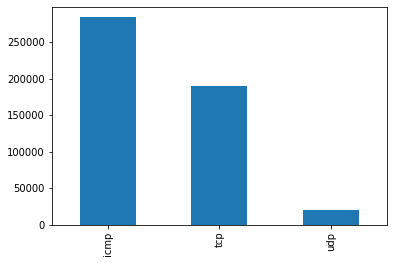

In [12]:
bar_graph('protocol_type')

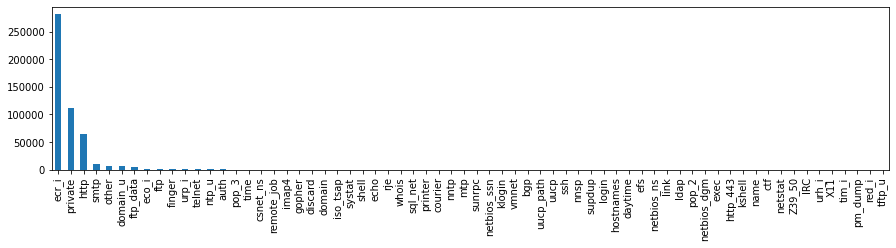

In [13]:
plt.figure(figsize=(15,3))
bar_graph('service')

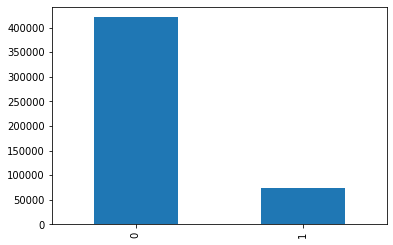

In [14]:
bar_graph('logged_in')

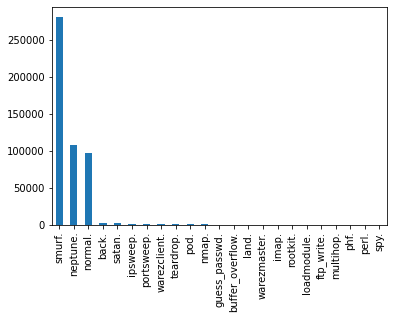

In [15]:
bar_graph('target')

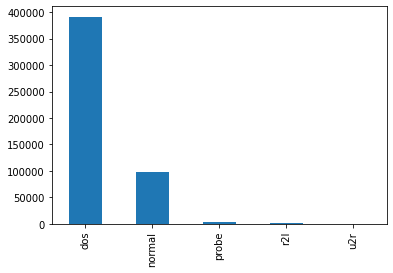

In [16]:
bar_graph('Attack Type')

In [17]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target', 'Attack Type'],
      dtype='object')

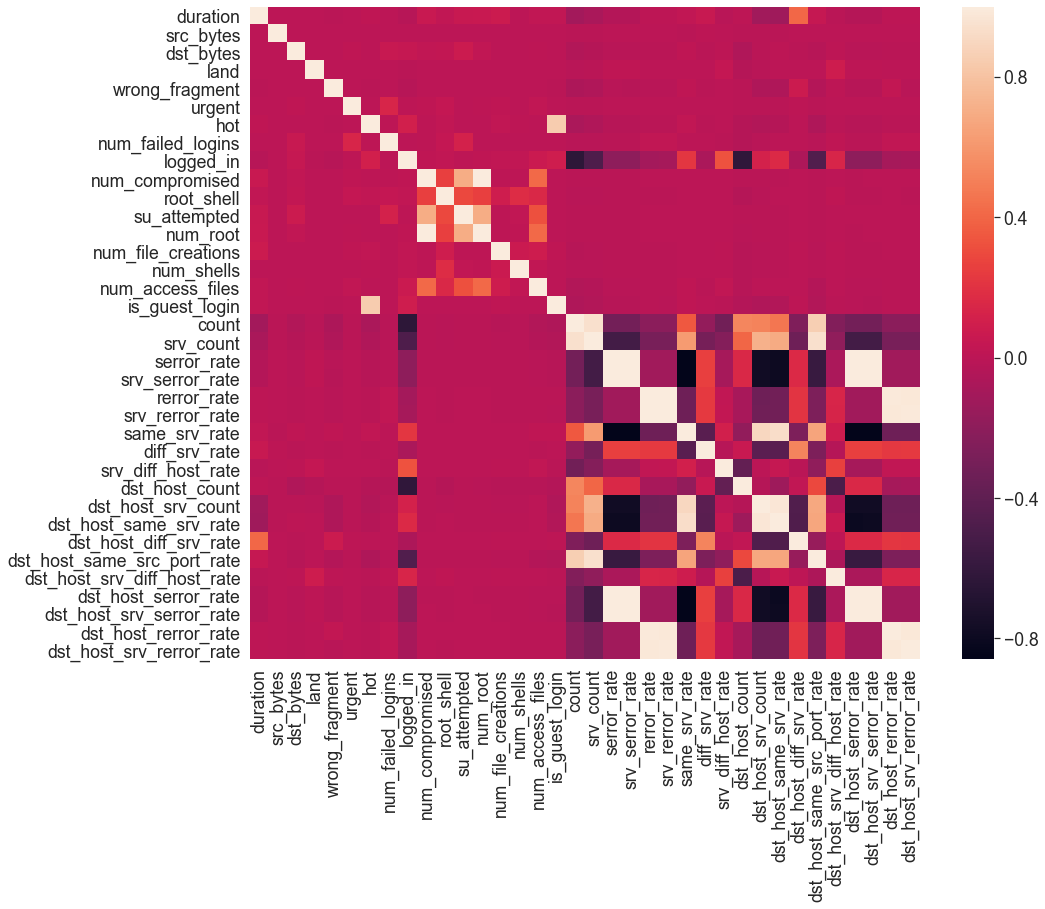

In [44]:
df = df.dropna('columns')# drop columns with NaN

df = df[[col for col in df if df[col].nunique() > 1]]# keep columns where there are more than 1 unique values

corr = df.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr)
sns.set(font_scale=1.6)


plt.show()

In [19]:
#only_na = df[np.invert(df.index.isin(na_free.index))]
df_nafree = df[[col for col in df if df[col].nunique() > 1]]
df1 = df_nafree.columns.values
df2 = df.columns.values
print(df1)

main_list = np.setdiff1d(df2,df1)
print(main_list)

['duration' 'protocol_type' 'service' 'flag' 'src_bytes' 'dst_bytes'
 'land' 'wrong_fragment' 'urgent' 'hot' 'num_failed_logins' 'logged_in'
 'num_compromised' 'root_shell' 'su_attempted' 'num_root'
 'num_file_creations' 'num_shells' 'num_access_files' 'is_guest_login'
 'count' 'srv_count' 'serror_rate' 'srv_serror_rate' 'rerror_rate'
 'srv_rerror_rate' 'same_srv_rate' 'diff_srv_rate' 'srv_diff_host_rate'
 'dst_host_count' 'dst_host_srv_count' 'dst_host_same_srv_rate'
 'dst_host_diff_srv_rate' 'dst_host_same_src_port_rate'
 'dst_host_srv_diff_host_rate' 'dst_host_serror_rate'
 'dst_host_srv_serror_rate' 'dst_host_rerror_rate'
 'dst_host_srv_rerror_rate' 'target' 'Attack Type']
[]


In [35]:
df_std = df.std()
df_std = df_std.sort_values(ascending = True)
df_std

Series([], dtype: float64)

In [21]:
df['protocol_type'].value_counts()

icmp    283602
tcp     190065
udp      20354
Name: protocol_type, dtype: int64

In [22]:
#protocol_type feature mapping
pmap = {'icmp':0,'tcp':1,'udp':2}
df['protocol_type'] = df['protocol_type'].map(pmap)

In [23]:
#flag feature mapping
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
df['flag'] = df['flag'].map(fmap)

In [25]:
df['service'] = encoder.fit_transform(df['service'])
df['Attack Type'] = encoder.fit_transform(df['Attack Type'])
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,1,22,0,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,1
1,0,1,22,0,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,1
2,0,1,22,0,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,1
3,0,1,22,0,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,1
4,0,1,22,0,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,1


In [26]:
#df.drop('service',axis = 1,inplace= True)

In [148]:
df.shape

(225745, 67)

df.head

In [29]:
df = df.drop(['target',], axis=1)
print(df.shape)

# Target variable and train set
Y = df[['Attack Type']]
X = df.drop(['Attack Type',], axis=1)

sc = MinMaxScaler()
X = sc.fit_transform(X)

# Split test and train data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(494021, 40)
(330994, 39) (163027, 39)
(330994, 1) (163027, 1)


In [33]:
df.shape

(494021, 40)

In [34]:
import sklearn
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [35]:
x=df.iloc[:,0:38]
y=df.iloc[:,[-1]]

In [36]:
x.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate
0,0,1,22,0,181,5450,0,0,0,0,...,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0
1,0,1,22,0,239,486,0,0,0,0,...,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0
2,0,1,22,0,235,1337,0,0,0,0,...,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0
3,0,1,22,0,219,1337,0,0,0,0,...,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0
4,0,1,22,0,217,2032,0,0,0,0,...,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0


In [37]:
y.head()

,Attack Type
0,1
1,1
2,1
3,1
4,1


In [52]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=13)

In [53]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [54]:
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [55]:
#SupportVectorMachine starts here
clf=svm.SVC()

In [56]:
start_time = time.time()
clf.fit(x_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

Training time:  66.87881231307983


In [57]:
start_time = time.time()
Y_test_pred_SVM = clf.predict(x_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

Testing time:  6.57898211479187


In [58]:
print("Train score is:", clf.score(x_train, y_train))
print("Test score is:",clf.score(x_test,y_test))

Train score is: 0.9993218898020323
Test score is: 0.9991194777592227


In [59]:
pred_clf=clf.predict(x_test)

In [61]:
sklearn.metrics.accuracy_score(y_test, Y_test_pred_SVM)

0.9991194777592227

In [60]:
print(sklearn.metrics.classification_report(y_test, Y_test_pred_SVM))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     78439
           1       1.00      1.00      1.00     19260
           2       1.00      0.98      0.99       872
           3       0.93      0.91      0.92       223
           4       1.00      0.18      0.31        11

    accuracy                           1.00     98805
   macro avg       0.98      0.82      0.84     98805
weighted avg       1.00      1.00      1.00     98805



In [63]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
start_time = time.time()
knn.fit(x_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

Training time:  263.7095549106598


In [64]:
start_time = time.time()
pred_knn=knn.predict(x_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

Testing time:  226.44102311134338


In [65]:
sklearn.metrics.accuracy_score(y_test, pred_knn)

0.9995243155710744

In [66]:
print(sklearn.metrics.classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     78439
           1       1.00      1.00      1.00     19260
           2       1.00      0.99      0.99       872
           3       0.95      0.96      0.95       223
           4       0.83      0.45      0.59        11

    accuracy                           1.00     98805
   macro avg       0.96      0.88      0.91     98805
weighted avg       1.00      1.00      1.00     98805



In [149]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()

In [150]:
start_time = time.time()
NB.fit(X_train, Y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

Training time:  0.5004532337188721


In [152]:
start_time = time.time()
Y_test_pred_NB = NB.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

Testing time:  0.38935327529907227


In [153]:
print("Train score is:", NB.score(X_train, Y_train))
print("Test score is:",NB.score(X_test,Y_test))

Train score is: 0.87939056297093
Test score is: 0.8791672545038552


In [154]:
print(sklearn.metrics.classification_report(Y_test, Y_test_pred_NB))

              precision    recall  f1-score   support

         dos       0.98      0.94      0.96    129106
      normal       0.97      0.64      0.77     32167
       probe       0.09      0.99      0.17      1348
         r2l       0.29      0.39      0.33       387
         u2r       0.01      0.74      0.01        19

    accuracy                           0.88    163027
   macro avg       0.47      0.74      0.45    163027
weighted avg       0.97      0.88      0.91    163027



In [155]:
#Decision Tree 
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [156]:
start_time = time.time()
DT.fit(X_train, Y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

Training time:  1.106003761291504


In [157]:
start_time = time.time()
Y_test_pred_DT = DT.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

Testing time:  0.024021387100219727


In [158]:
print("Train score is:", DT.score(X_train, Y_train))
print("Test score is:",DT.score(X_test,Y_test))
print(sklearn.metrics.classification_report(Y_test, Y_test_pred_DT))

Train score is: 0.9905255080152511
Test score is: 0.990437166849663


C:\Users\Mohab\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         dos       1.00      1.00      1.00    129106
      normal       0.98      0.98      0.98     32167
       probe       0.55      0.90      0.68      1348
         r2l       0.00      0.00      0.00       387
         u2r       0.00      0.00      0.00        19

    accuracy                           0.99    163027
   macro avg       0.51      0.57      0.53    163027
weighted avg       0.99      0.99      0.99    163027



In [163]:
#LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(max_iter=1200000)

In [164]:
start_time = time.time()
LR.fit(X_train, Y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

C:\Users\Mohab\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mohab\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Training time:  12.738579034805298


In [165]:
start_time = time.time()
Y_test_pred_LR = LR.predict(X_test)
end_time = time.time()

print("Testing time: ",end_time-start_time)

Testing time:  0.025022029876708984


In [166]:
print("Train score is:", LR.score(X_train, Y_train))
print("Test score is:",LR.score(X_test,Y_test))
print(sklearn.metrics.classification_report(Y_test, Y_test_pred_LR))

Train score is: 0.9941237605515508
Test score is: 0.9941972802051194
              precision    recall  f1-score   support

         dos       1.00      1.00      1.00    129106
      normal       0.98      1.00      0.99     32167
       probe       0.98      0.90      0.94      1348
         r2l       0.84      0.82      0.83       387
         u2r       0.86      0.32      0.46        19

    accuracy                           0.99    163027
   macro avg       0.93      0.81      0.84    163027
weighted avg       0.99      0.99      0.99    163027



In [167]:
#GRADIENT BOOSTING CLASSIFIER

from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(random_state=0)

In [168]:
start_time = time.time()
GBC.fit(X_train, Y_train.values.ravel())
end_time = time.time()

print("Training time: ",end_time-start_time)

Training time:  353.7887005805969


In [169]:
start_time = time.time()
Y_test_pred_GBC = GBC.predict(X_test)
end_time = time.time()

print("Testing time: ",end_time-start_time)

Testing time:  1.2040956020355225


In [170]:
print("Train score is:", GBC.score(X_train, Y_train))
print("Test score is:", GBC.score(X_test,Y_test))
print(sklearn.metrics.classification_report(Y_test, Y_test_pred_GBC))

Train score is: 0.9871961425282634
Test score is: 0.9871064302232145
              precision    recall  f1-score   support

         dos       1.00      1.00      1.00    129106
      normal       1.00      0.95      0.97     32167
       probe       1.00      0.65      0.78      1348
         r2l       0.13      0.77      0.23       387
         u2r       0.28      0.79      0.42        19

    accuracy                           0.99    163027
   macro avg       0.68      0.83      0.68    163027
weighted avg       1.00      0.99      0.99    163027



In [171]:
#Keras Classifier
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

Using TensorFlow backend.


In [177]:
def fun():
    model = Sequential()
    
    #here 30 is output dimension
    model.add(Dense(39,input_dim =39,activation = 'relu',kernel_initializer='random_uniform'))
    
    #in next layer we do not specify the input_dim as the model is sequential so output of previous layer is input to next layer
    model.add(Dense(1,activation='sigmoid',kernel_initializer='random_uniform'))
    
    #5 classes-normal,dos,probe,r2l,u2r
    model.add(Dense(5,activation='softmax'))
    
    #loss is categorical_crossentropy which specifies that we have multiple classes
    
    model.compile(loss ='categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
    
    return model

In [178]:
KC = KerasClassifier(build_fn=fun,epochs=100,batch_size=64)

In [179]:
start = time.time()
KC.fit(X_train, Y_train.values.ravel())
end = time.time()


Epoch 1/100
330994/330994 [==============================] - 3s 9us/step - loss: 0.3182 - accuracy: 0.9321
Epoch 2/100
330994/330994 [==============================] - 3s 9us/step - loss: 0.0812 - accuracy: 0.9846
Epoch 3/100
330994/330994 [==============================] - 3s 9us/step - loss: 0.0664 - accuracy: 0.9847
Epoch 4/100
330994/330994 [==============================] - 3s 9us/step - loss: 0.0615 - accuracy: 0.9847
Epoch 5/100
330994/330994 [==============================] - 3s 9us/step - loss: 0.0585 - accuracy: 0.9847
Epoch 6/100
330994/330994 [==============================] - 3s 9us/step - loss: 0.0559 - accuracy: 0.9847
Epoch 7/100
330994/330994 [==============================] - 3s 9us/step - loss: 0.0483 - accuracy: 0.9850
Epoch 8/100
330994/330994 [==============================] - 3s 9us/step - loss: 0.0376 - accuracy: 0.9869
Epoch 9/100
330994/330994 [==============================] - 3s 9us/step - loss: 0.0308 - accuracy: 0.9896
Epoch 10/100
330994/330994 [========

In [180]:
print('Training time')
print((end-start))

Training time
300.86636543273926


In [181]:
start_time = time.time()
Y_test_pred_KC = KC.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

Testing time:  0.5064609050750732


In [182]:
start_time = time.time()
Y_train_pred_KC = KC.predict(X_train)
end_time = time.time()
print(accuracy_score(Y_train,Y_train_pred_KC))
print(accuracy_score(Y_test,Y_test_pred_KC))

0.9994894167265872
0.9991473804952554


In [183]:
print(sklearn.metrics.classification_report(Y_test, Y_test_pred_KC))

C:\Users\Mohab\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         dos       1.00      1.00      1.00    129106
      normal       1.00      1.00      1.00     32167
       probe       0.99      0.98      0.99      1348
         r2l       0.86      0.89      0.87       387
         u2r       0.00      0.00      0.00        19

    accuracy                           1.00    163027
   macro avg       0.77      0.77      0.77    163027
weighted avg       1.00      1.00      1.00    163027

